In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Lab bilgisayarını kullananlar anaconda promptu açıp şu kodları yazsınlar
#conda activate env_bst
#pip install numpy==1.23.5
#pip install tensorflow-hub==0.12.0
#
#Kendi bilgisayarını kullananlar anaconda promptu açıp şu kodları yazsınlar
#conda activate kendi env isminiz (conda env list)
#pip install tensorflow-hub==0.12.0

In [3]:
# MNIST Veri Setinin Keras Kütüphanesi üzerinden yüklenmesi

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Veri Ön işleme - Adım 1 - Görüntülerin yeniden boyutlandırılması
x_train = x_train.reshape(-1, 28, 28, 1) # -1: Görüntünün toplam sayısı
x_test = x_test.reshape(-1, 28, 28, 1)

# Veri Ön işleme - Adım 2 - Görüntülerin Normalize edilmesi
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Eğitim (Train) Verilerinin Sayısı ve Boyutu = {x_train.shape}")
print(f"Test Verilerinin Sayısı ve Boyutu = {x_test.shape}")

Eğitim (Train) Verilerinin Sayısı ve Boyutu = (60000, 28, 28, 1)
Test Verilerinin Sayısı ve Boyutu = (10000, 28, 28, 1)


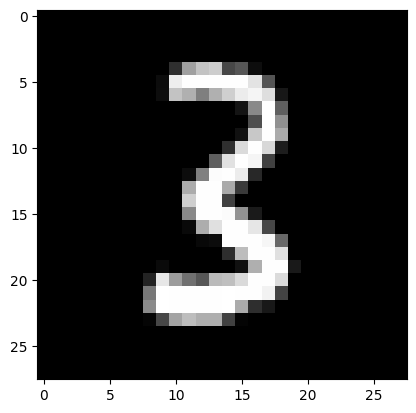

In [5]:
# Çıkış verisi olarak bu girdi görüntülerinin hangi rakamı temsil ettiğini
# gösteren y verilerini düzenliyoruz

plt.imshow(x_train[50000],cmap="gray")

In [6]:
y_train[50000]

3

In [7]:
# One-hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
y_train[50000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
# Eğitim verilerinin %20'sinin doğrulama (validation) verisi olarak ayrılması
# Literatürde Data-Split işlemi denilir
# Bu işlem genellikle sklear altındaki train_test_split fonksiyonu ile yapılır

X_train, X_val, y_train_split, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.2, # validasyon verisi yüzde kaç olacak bilgisi burada
    random_state = 42, # rastgelelik işlemini biraz sınırlı tutuyoruz
    stratify = y_train # rastgele şekilde dağılım yaparken sınıf dengesini korur
)

In [10]:
# CNN tabanlı yapay zekâ modelimizi oluşturuyoruz

model = keras.Sequential([
    # CNN İlk Blok
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    
    # CNN İkinci Blok
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    # YAPAY SİNİR AĞI TANIMLIYORUZ
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') # softmax, çoklu sınıflandırma
    #problemlerinde en sık kullanılan aktivasyon fonksiyonudur
])

In [11]:
# Modeli Derliyoruz

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'mnist_classification_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [13]:
# Modelimizi eğitiyoruz (.fit fonksiyonu ile)
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train_split, validation_data=(X_val, y_val),
                       batch_size=128, epochs=10, callbacks=model_checkpoint)

Epoch 1/10
371/375 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.9431
Epoch 1: val_accuracy improved from -inf to 0.21867, saving model to mnist_classification_cnn_model.h5
375/375 [==============================] - 14s 16ms/step - loss: 0.1895 - accuracy: 0.9434 - val_loss: 4.7578 - val_accuracy: 0.2187
Epoch 2/10
374/375 [============================>.] - ETA: 0s - loss: 0.0634 - accuracy: 0.9807
Epoch 2: val_accuracy improved from 0.21867 to 0.98850, saving model to mnist_classification_cnn_model.h5
375/375 [==============================] - 5s 15ms/step - loss: 0.0634 - accuracy: 0.9807 - val_loss: 0.0338 - val_accuracy: 0.9885
Epoch 3/10
373/375 [============================>.] - ETA: 0s - loss: 0.0477 - accuracy: 0.9849
Epoch 3: val_accuracy improved from 0.98850 to 0.99050, saving model to mnist_classification_cnn_model.h5
375/375 [==============================] - 6s 15ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0340 - val_accuracy: 0.9905


In [14]:
print("Test işlemi için Değerlendirme yapılıyor")

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Modelin Loss Performansı = {test_loss}")
print(f"Modelin Accuracy (Doğruluk Başarısı) Performansı = {test_accuracy}")

Test işlemi için Değerlendirme yapılıyor
313/313 [==============================] - 2s 6ms/step - loss: 0.0206 - accuracy: 0.9936
Modelin Loss Performansı = 0.020633455365896225
Modelin Accuracy (Doğruluk Başarısı) Performansı = 0.9936000108718872


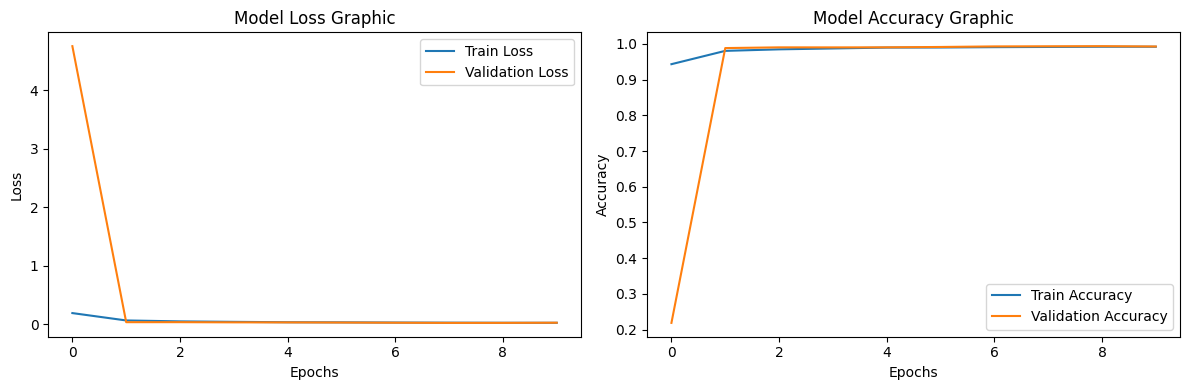

In [30]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Graphic")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Graphic")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# MODEL TAHMİNİ (TEST VERİLERİNİN TAHMİNİ)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict işlemi ile x_test verilerini tahmin edeceğiz
# giriş görüntüsünün hangi rakamı temsil ettiğini bulmasını sağlayacağız
y_pred = model.predict(x_test)

# En güçlü tahmini seçer
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 2s 4ms/step


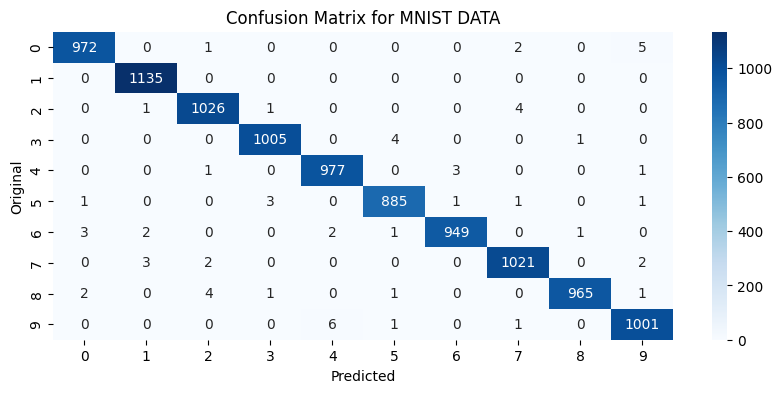

In [34]:
# Prediction vs Original Data
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Yukarıdaki matrisi görselleştiriyoruz
plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for MNIST DATA")
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.show()